In [227]:
!pip install japanize-matplotlib
import japanize_matplotlib

# matplotlibの図をセルに表示するための設定
%matplotlib inline

In [228]:
# pandasのインポート
import pandas as pd

# CSVの読み込み
df1 = pd.read_csv('Boston2_kouka2_1.tsv', sep = '\t')
df2 = pd.read_csv('Boston2_kouka2_2.tsv', sep = '\t')

# 正しく読み込めているかを確認するため、それぞれのデータフレームの内容を表示する
print('===Boston2_kouka2_1.csv===')
print(df1.head())

print('===Boston2_kouka2_2.csv===')
print(df2.head())

===Boston2_kouka2_1.csv===
         犯罪    広さ     産業  川辺  窒素酸化物  ...   税金  生徒と先生      黒人    低所得    価格
0      high   0.0  18.10  no  0.718  ...  666   20.2  354.70   7.12  27.5
1       low   0.0   8.14  no  0.538  ...  307   21.0  232.60  27.71  13.2
2  very_low  82.5   2.03  no  0.415  ...  348   14.7  393.77   7.43  24.1
3       low   0.0  21.89  no  0.624  ...  437   21.2  396.90  18.46  17.8
4      high   0.0  18.10  no  0.614  ...  666   20.2  374.68  11.66  29.8

[5 rows x 14 columns]
===Boston2_kouka2_2.csv===
         犯罪    広さ     産業  川辺  窒素酸化物  ...   税金  生徒と先生      黒人    低所得    価格
0       low   0.0   8.14  no  0.538  ...  307   21.0  392.53  13.83  19.6
1  very_low   0.0   4.05  no  0.510  ...  296   16.6  395.50   9.04  23.6
2  very_low  40.0   6.41  no  0.447  ...  254   17.6  396.90   2.98  32.0
3       low   0.0   9.90  no  0.544  ...  304   18.4  395.21  10.36  23.1
4      high   0.0  18.10  no  0.718  ...  666   20.2  318.75  15.02  16.7

[5 rows x 14 columns]


In [229]:
# データフレームを行方向に連結する
# この際、同じインデックス名がつくのを防ぐため、ignore_index=Trueとする
df = pd.concat([df1, df2], axis=0, ignore_index=True)

# 正しく連結できているかを確認するため、行数、列数を表示する
print(df.shape)

(100, 14)


In [230]:
# 文字列データをダミー変数化する
# ダミー変数化の結果が変わらないよう、データ分割前にダミー変数化を実施する
# データフレームを丸ごと渡すことで、文字の列のみダミー変数化し、それ以外は元のままとしたデータフレームを取得できる
df_dummied = pd.get_dummies(df, drop_first=True)

# 正しくダミー変数化されていることを確認するため、内容を表示する
df_dummied.head()

,広さ,産業,窒素酸化物,部屋数,古さ,主要施設,高速道路,税金,生徒と先生,黒人,低所得,価格,犯罪_low,犯罪_very_low,川辺_yes
0,0.0,18.10,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,0,0,0
1,0.0,8.14,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,1,0,0
2,82.5,2.03,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,1,0
3,0.0,21.89,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,1,0,0
4,0.0,18.10,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,0,0,0


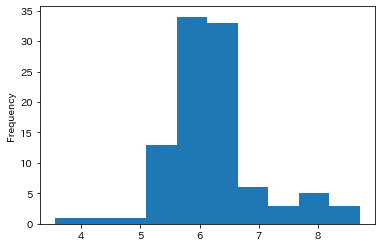

In [231]:
# 「部屋数」のヒストグラムを確認する
df_dummied['部屋数'].plot(kind='hist')

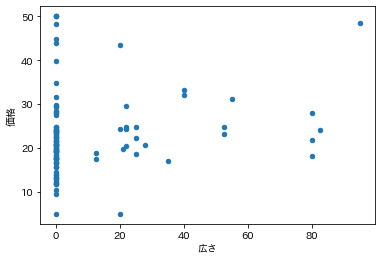

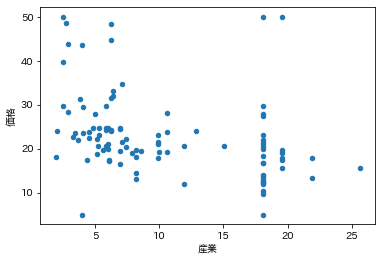

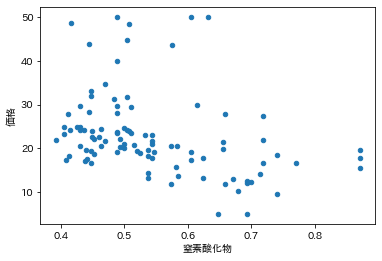

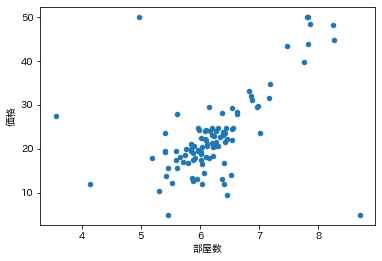

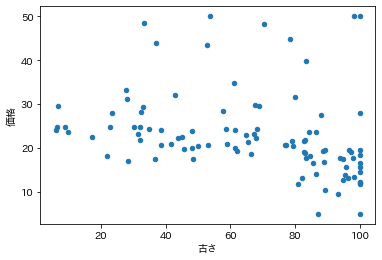

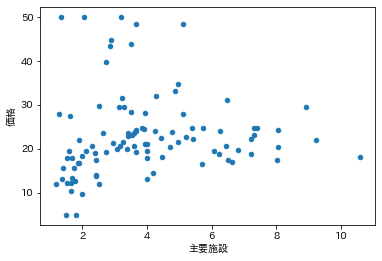

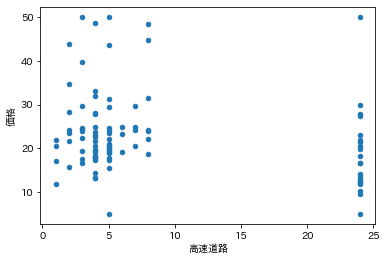

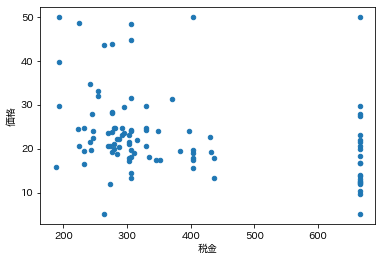

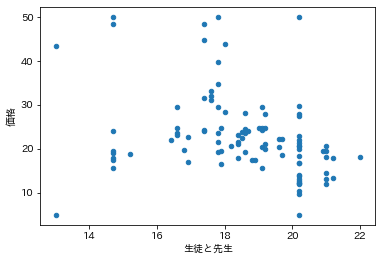

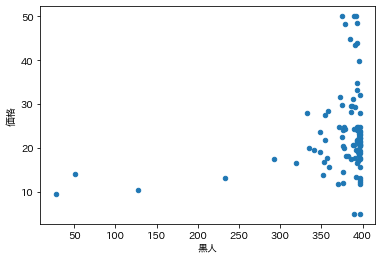

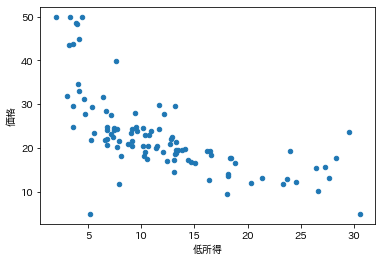

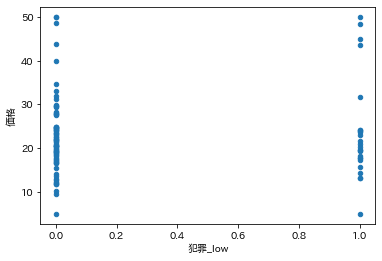

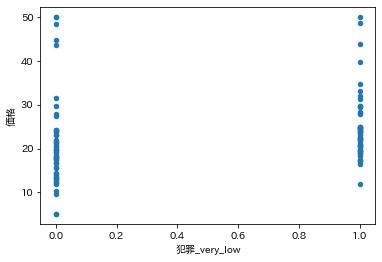

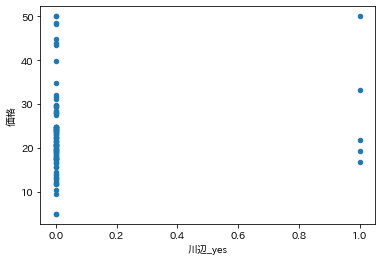

In [232]:
# 外れ値を視覚的に確認するため、「価格」とそれ以外の全ての列の組み合わせの散布図を表示する
# for文を使って散布図を描き、「価格」同士の散布図は意味がないので描かない
for name in df_dummied.columns:
  if name == '価格':
    continue
  df_dummied.plot(kind = 'scatter', x = name, y = '価格')

In [233]:
# 「価格」と「部屋数」の散布図より、外れ値があると判断した
# 該当箇所のデータを削除する前に、正しく外れ値を抽出できているか確認する
print(df_dummied[(df['価格'] < 30) & (df['部屋数'] < 5)])
print(df_dummied[(df['価格'] > 40) & (df['部屋数'] < 6)])
print(df_dummied[(df['価格'] < 10) & (df['部屋数'] > 8)])

     広さ    産業  窒素酸化物    部屋数     古さ  ...    低所得    価格  犯罪_low  犯罪_very_low  川辺_yes
0   0.0  18.1  0.718  3.561   87.9  ...   7.12  27.5       0            0       0
88  0.0  18.1  0.659  4.138  100.0  ...  23.34  11.9       0            0       0

[2 rows x 15 columns]
     広さ    産業  窒素酸化物   部屋数     古さ  ...   低所得    価格  犯罪_low  犯罪_very_low  川辺_yes
76  0.0  18.1  0.631  4.97  100.0  ...  3.26  50.0       0            0       0

[1 rows x 15 columns]
      広さ    産業  窒素酸化物    部屋数    古さ  ...   低所得   価格  犯罪_low  犯罪_very_low  川辺_yes
11  20.0  3.97  0.647  8.704  86.9  ...  5.12  5.0       1            0       0

[1 rows x 15 columns]


In [234]:
# 外れ値のindexを取得
outlier1 = df_dummied[(df['価格'] < 30) & (df['部屋数'] < 5)].index
# 外れ値を削除
df_dropped = df_dummied.drop(outlier1)

# 外れ値のindexを取得
outlier2 = df_dummied[(df['価格'] > 40) & (df['部屋数'] < 6)].index
# 外れ値を削除
df_dropped = df_dropped.drop(outlier2)

# 外れ値のindexを取得
outlier3 = df_dummied[(df['価格'] < 10) & (df['部屋数'] > 8)].index
# 外れ値を削除
df_dropped = df_dropped.drop(outlier3)

# 外れ値削除後の行列数を表示し、4行減っていることを確認する
df_dropped.shape

(96, 15)

In [235]:
# 各列に欠損値がどれだけ含まれているかを確認する
# 欠損値がある場合は穴埋めを考えるが、欠損値が多く分析で使えない列かもしれない
df_dropped.isnull().sum()

広さ             0
産業             0
窒素酸化物          1
部屋数            0
古さ             0
主要施設           0
高速道路           1
税金             0
生徒と先生          0
黒人             0
低所得            0
価格             0
犯罪_low         0
犯罪_very_low    0
川辺_yes         0
dtype: int64

In [236]:
# 中央値で穴埋めすることとし、モデルの性能が良くなければ別の対処も考えることにする
df_fillna = df_dropped.fillna(df_dropped.median())

# 欠損値が補完されたことを確認する
df_fillna.isnull().any( axis=0 )

広さ             False
産業             False
窒素酸化物          False
部屋数            False
古さ             False
主要施設           False
高速道路           False
税金             False
生徒と先生          False
黒人             False
低所得            False
価格             False
犯罪_low         False
犯罪_very_low    False
川辺_yes         False
dtype: bool

In [237]:
# 「価格」と関係のある項目を散布図から視覚的に見つけることもできるが、数値(相関係数)でも確認しておく
cor = df_fillna.corr()['価格']

# 相関係数の絶対値の降順に表示する
cor.map(abs).sort_values(ascending = False)

価格             1.000000
部屋数            0.843683
低所得            0.678873
生徒と先生          0.455235
産業             0.447182
税金             0.407852
窒素酸化物          0.374507
古さ             0.346462
高速道路           0.315428
黒人             0.273401
犯罪_very_low    0.231832
広さ             0.209639
川辺_yes         0.139026
主要施設           0.103802
犯罪_low         0.096500
Name: 価格, dtype: float64

In [238]:
# 相関係数が四捨五入して0.6以上を特徴量に含めることとする
X = df_fillna[ ['部屋数', '低所得'] ]
y = df_fillna[['価格']]

In [239]:
# 多項式特徴量として部屋数の二乗を「部屋数2」として加える
X['部屋数2'] = X['部屋数'] ** 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [240]:
# LinearRegressionをインポートする
from sklearn.linear_model import LinearRegression
# train_test_splitをインポートする
from sklearn.model_selection import train_test_split
# StandardScalerをインポートする
from sklearn.preprocessing import StandardScaler

# チューニングで学習を試しやすいようlearn関数を定義する
def learn(x, t):
    X_train, X_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

    # 訓練データを標準化
    sc_model_X = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_X.fit(X_train)
    sc_X_train = sc_model_X.transform(X_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)

    # 学習させる
    model = LinearRegression()
    model.fit(sc_X_train, sc_y_train)

    # 検証データを標準化
    sc_X_val = sc_model_X.transform(X_val)
    sc_y_val = sc_model_y.transform(y_val)

    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_X_train, sc_y_train)
    val_score = model.score(sc_X_val, sc_y_val)
    return train_score, val_score

In [241]:
# 低所得列を2乗したシリーズを、新しい列'低所得2'として、特徴量Xに追加する
X['低所得2'] = X['低所得'] ** 2

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(X, y)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.8471098690192963
検証データでの決定係数: 0.7495506613238483


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [242]:
# 回帰（LinearRegression）モデルでk分割交差検証を実施する
# k分割交差検証(回帰モデル)をインポート
from sklearn.model_selection import KFold

# cross_validateインポート
from sklearn.model_selection import cross_validate

# LinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# KFoldのオブジェクトを作成する
# 分割数は3とする
kf = KFold(n_splits = 3, shuffle = True, random_state = 0)

# 回帰モデルを生成する
model = LinearRegression()

# 交差検証を行い、結果をresultへ代入する
# 評価指標は'r2(決定係数)'とする
# 評価指標は'accuracy(正解率)'とする
# 訓練データでの結果も取得する
result = cross_validate(model, X, y, cv=kf, scoring='r2', return_train_score = True)

# 検証結果データ(辞書型)を表示する
print(result)

{'fit_time': array([0.00391316, 0.00344062, 0.003546  ]), 'score_time': array([0.00282311, 0.00289416, 0.00282526]), 'test_score': array([0.77809298, 0.84755127, 0.8171189 ]), 'train_score': array([0.85538705, 0.81492685, 0.83745551])}


In [243]:
# 検証結果はデータフレームの方が見やすいので、データフレームで確認する
pd.DataFrame(result)

,fit_time,score_time,test_score,train_score
0,0.003913,0.002823,0.778093,0.855387
1,0.003441,0.002894,0.847551,0.814927
2,0.003546,0.002825,0.817119,0.837456


In [244]:
# 検証データでの決定係数の平均を表示する
# test_scoreの合計 / 検証回数(分割数)
result['test_score'].sum() / 3

0.8142543811500045

In [248]:
# k分割交差検証でモデルが有効なことがわかったので、訓練データでモデルを作成する
# 元のデータフレームを、訓練データとテストデータに分割して回帰(LineaRegression)モデルに学習させる

# train_test_splitをインポートする
from sklearn.model_selection import train_test_split

# X, y を訓練データ、テストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# 訓練データをモデルに学習させる
model.fit(X = X_train, y = y_train)

LinearRegression()

In [251]:
# テストデータで予測した結果と、テストデータの正解データで、まずはMSEを求める
# mean_squared_errorのインポート
from sklearn.metrics import mean_squared_error

# MSEを計算する
mse = mean_squared_error(model.predict(X_test), y_test)
print('mse:', mse)

# MSEから2乗平均平方根誤差(RMSE)を求める
# sqrtを使うため、mathをインポート
import math

# RMSEを計算する
print('rmse:', math.sqrt(mse) )

mse: 15.524816766058915
rmse: 3.940154408910762


In [252]:
# テストデータでの決定係数を表示する
print('score:', model.score(X_test, y_test))

score: 0.7730059497272611
